# Ala a sbalzo caricata con carico triangolare

In [52]:
%clear all

In [53]:
%%latex
\begin{align}
\frac{dV}{dz} = -v(z) \\
\frac{dM}{dz} = -V(z)
\end{align}

<IPython.core.display.Latex object>

In [54]:
import matplotlib.pyplot as plt
from sympy import *
init_printing()
import numpy as np
import pandas as pd

In [55]:
theq0 = 135.0
thel0 = 5.0
zs = np.linspace(0,thel0,11)
zs

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [56]:
z = Symbol("z")
q0 = Symbol("q0")
l0 = Symbol("l0")
V = Function("V")
M = Function("M")
v = Function("v")

## Definizione del carico applicato v(z)

In [57]:
load = Eq(v(z),-q0/l0*z+q0)
load

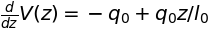

In [58]:
EqIndShear = Eq(Derivative(V(z),z),-load.rhs)
EqIndShear

### Determinazione del taglio V(z)

In [59]:
Shear = dsolve(EqIndShear,ics={V(l0):0})
Shear

In [60]:
Shear.subs([(q0,theq0),(l0,thel0)])

In [61]:
theV = []
for i in range(len(zs)):
    theV.append(Shear.rhs.subs([(q0,135),(l0,5),(z,zs[i])]))

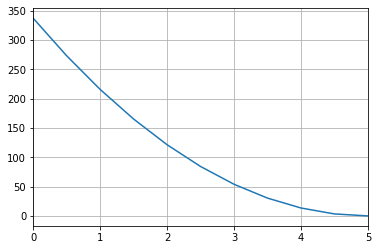

In [62]:
plt.plot(zs,theV)
plt.xlim(0,5)
plt.grid()
plt.show()

### Determinazione del momento flettente M(z)

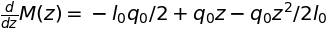

In [63]:
EqIndBending = Eq(Derivative(M(z),z),-Shear.rhs)
EqIndBending

In [64]:
Bending = dsolve(EqIndBending,ics={M(l0):0})
Bending

In [65]:
Bending.subs([(q0,135),(l0,5)])

In [66]:
theM = []
for i in range(len(zs)):
    theM.append(Bending.rhs.subs([(q0,135),(l0,5),(z,zs[i])]))

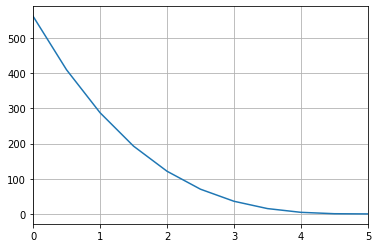

In [67]:
plt.plot(zs,theM)
plt.xlim(0,5)
plt.grid()
plt.show()

In [68]:
dataV = []
dataM = []
for i in range(len(zs)):
    dataV.append(round(theV[i],2))
    dataM.append(round(theM[i],3))
data = {"z (m)":zs,"V (N)":dataV,"M (Nm)":dataM}
df = pd.DataFrame(data)
df

,z (m),V (N),M (Nm)
0,0.0,337.50,562.500
1,0.5,273.38,410.062
2,1.0,216.00,288.000
3,1.5,165.38,192.938
4,2.0,121.50,121.500
5,2.5,84.38,70.312
6,3.0,54.00,36.000
7,3.5,30.38,15.188
8,4.0,13.50,4.500
9,4.5,3.38,0.562
